In [1]:
!pip install -q darts

     |████████████████████████████████| 290 kB 30.8 MB/s 
     |████████████████████████████████| 1.4 MB 41.0 MB/s 
     |████████████████████████████████| 177 kB 53.2 MB/s 
     |████████████████████████████████| 11.2 MB 39.0 MB/s 
     |████████████████████████████████| 9.8 MB 11.4 MB/s 
     |████████████████████████████████| 155 kB 60.8 MB/s 
     |████████████████████████████████| 65 kB 3.9 MB/s 
     |████████████████████████████████| 791 kB 39.3 MB/s 
     |████████████████████████████████| 374 kB 52.7 MB/s 
     |████████████████████████████████| 884 kB 45.8 MB/s 
     |████████████████████████████████| 49 kB 6.1 MB/s 
     |████████████████████████████████| 216 kB 58.4 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jupyter-console 5.2.0 requires prompt-toolkit<2.0.0,>=1.0.0, but you have prompt-toolkit 3.0.24 which is incompatible.
google-colab 

In [2]:
!pip install -q matplotlib==3.1.3

     |████████████████████████████████| 13.1 MB 24.4 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fbprophet 0.7.1 requires cmdstanpy==0.9.5, but you have cmdstanpy 0.9.68 which is incompatible.
darts 0.14.0 requires matplotlib>=3.3.0, but you have matplotlib 3.1.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [3]:
import numpy as np
import pandas as pd
from darts import TimeSeries
from darts.models import BlockRNNModel
from darts.dataprocessing.transformers import Scaler
from darts.utils.timeseries_generation import datetime_attribute_timeseries
from darts.metrics import mape
import matplotlib.pyplot as plt

In [22]:
df = pd.read_csv('/content/retail_sales.csv')

In [23]:
series = TimeSeries.from_dataframe(df,'ds','y')

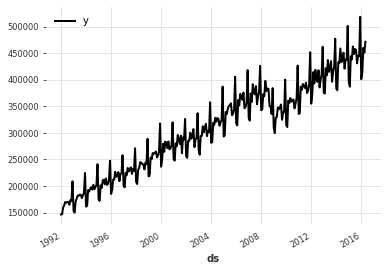

In [24]:
series.plot()

In [31]:
# Create training and validation sets:
train, val = series.split_after(pd.Timestamp('20160101'))

# Normalize the time series (note: we avoid fitting the transformer on the validation set)
transformer = Scaler()
train_transformed = transformer.fit_transform(train)
val_transformed = transformer.transform(val)
series_transformed = transformer.transform(series)

In [32]:
# create month and year covariate series
year_series = datetime_attribute_timeseries(pd.date_range(start=series.start_time(), freq=series.freq_str, periods=1000),
                                             attribute='year', one_hot=False)
year_series = Scaler().fit_transform(year_series)
month_series = datetime_attribute_timeseries(year_series, attribute='month', one_hot=True)
covariates = year_series.stack(month_series)
cov_train, cov_val = covariates.split_after(pd.Timestamp('20160101'))

In [33]:
my_model = BlockRNNModel(
    model='LSTM',
    input_chunk_length=12,
    output_chunk_length=10,
    n_epochs=300,
    random_state=0
)

In [34]:
my_model.fit(train_transformed,
             past_covariates=cov_train,
             verbose=True)

[2021-12-10 07:31:40,495] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 268 samples.
[2021-12-10 07:31:40,495] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 268 samples.
[2021-12-10 07:31:40,503] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
[2021-12-10 07:31:40,503] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
  1%|          | 2/300 [00:00<00:34,  8.59it/s]

  4%|▍         | 12/300 [00:01<00:31,  9.22it/s]

  7%|▋         | 22/300 [00:02<00:30,  9.15it/s]

 11%|█         | 32/300 [00:03<00:30,  8.90it/s]

 14%|█▍        | 42/300 [00:04<00:28,  9.03it/s]

 17%|█▋        | 52/300 [00:05<00:26,  9.46it/s]

 21%|██        | 62/300 [00:06<00:26,  8.88it/s]

 24%|██▍       | 72/300 [00:07<00:24,  9.39it/s]

 27%|██▋       | 82/300 [00:09<00:23,  9.12it/s]

 31%|███       | 92/300 [00:10<00:23,  8.92it/s]

 34%|███▍      | 102/300 [00:11<00:22,  8.65it/s]

 37%|███▋      | 112/300 [00:12<00:20,  9.14it/s]

 41%|████      | 122/300 [00:13<00:19,  9.29it/s]

 44%|████▍     | 132/300 [00:14<00:18,  9.09it/s]

 47%|████▋     | 142/300 [00:15<00:17,  9.20it/s]

 51%|█████     | 152/300 [00:16<00:16,  9.16it/s]

 54%|█████▍    | 162/300 [00:17<00:15,  9.02it/s]

 57%|█████▋    | 172/300 [00:18<00:13,  9.46it/s]

 61%|██████    | 182/300 [00:20<00:13,  8.92it/s]

 64%|██████▍   | 192/300 [00:21<00:11,  9.05it/s]

 67%|██████▋   | 202/300 [00:22<00:11,  8.75it/s]

 71%|███████   | 212/300 [00:23<00:09,  9.35it/s]

 74%|███████▍  | 222/300 [00:24<00:08,  9.01it/s]

 77%|███████▋  | 232/300 [00:25<00:07,  9.11it/s]

 81%|████████  | 242/300 [00:26<00:06,  9.21it/s]

 84%|████████▍ | 252/300 [00:27<00:05,  9.31it/s]

 87%|████████▋ | 262/300 [00:28<00:04,  8.98it/s]

 91%|█████████ | 272/300 [00:30<00:03,  9.11it/s]

 94%|█████████▍| 282/300 [00:31<00:01,  9.36it/s]

 97%|█████████▋| 292/300 [00:32<00:00,  9.36it/s]

100%|██████████| 300/300 [00:33<00:00,  9.05it/s]


In [35]:
predicted = my_model.predict(n=10)

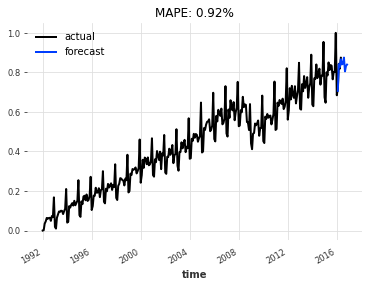

In [36]:
series_transformed.plot(label='actual')
predicted.plot(label='forecast')
plt.title('MAPE: {:.2f}%'.format(mape(predicted, val_transformed[:11])))
plt.legend()
plt.show()